<a href="https://colab.research.google.com/github/wahid-hawk/customer-segmentation-and-recommendation/blob/main/customer_segmentation_and_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Segmentation And Recommondation System**

# **Problem Statement**
In this project, we delve deep into the thriving sector of online retail by analyzing a transactional dataset from a UK-based retailer, available at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/352/online+retail). This dataset documents all transactions between 2010 and 2011. Our primary objective is to amplify the efficiency of marketing strategies and boost sales through customer segmentation. We aim to transform the transactional data into a customer-centric dataset by creating new features that will facilitate the segmentation of customers into distinct groups using the K-means clustering algorithm. This segmentation will allow us to understand the distinct profiles and preferences of different customer groups. Building upon this, we intend to develop a recommendation system that will suggest top-selling products to customers within each segment who haven't purchased those items yet, ultimately enhancing marketing efficacy and fostering increased sales.

[Dataset link (Online retail)](https://docs.google.com/spreadsheets/d/18Kk4XAjivdxbFGb1NsK_mCBwBArCX0s_/edit?usp=sharing&ouid=101436785911328137121&rtpof=true&sd=true)

# Phase 1

##Data Acquvisation and initial Exploration

### 1.1 Load the data and import libraries



In [49]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
file_path = '/content/drive/MyDrive/customer segmentation and Recommendation System /Online Retail.xlsx'

try:
    df = pd.read_excel(file_path)
    print("Data loaded successfully from Google Drive.")
    print(df.head())
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please check the path and ensure your Drive is mounted correctly.")
except Exception as e:
    print(f"An error occurred while loading the file: {e}")

try:
    df = pd.read_csv(file_path, encoding='ISO-8859-1')
    print("Data loaded successfully from Google Drive.")
    print(df.head())
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please check the path and ensure your Drive is mounted correctly.")
except Exception as e:
    print(f"An error occurred while loading the file: {e}")

try:
    df = pd.read_csv(file_path, encoding='ISO-8859-1')
    print("Data loaded successfully from Google Drive.")
    print(df.head())
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please check the path and ensure your Drive is mounted correctly.")
except Exception as e:
    print(f"An error occurred while loading the file: {e}")

Data loaded successfully from Google Drive.
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
An error occurred while loading the file: Error tokenizing data. C error: Expected 2 fields in line 3, saw 3

An error occurred while loading the

In [52]:
df.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


### 1.2 Initial data Inspection

In [53]:
print("\nInitial Data Head:")
print(df.head())

print("\nData Info:")
df.info()

print("\nDescriptive Statistics:")
print(df.describe())

print("\nMissing Values Before Preprocessing:")
print(df.isnull().sum())

print("\nInitial DataFrame Shape:", df.shape)


Initial Data Head:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype       

# Phase 2

## Data Preprocessing and Feature Engineering

### 2.1 Handlling Missing Values

In [54]:
# Drop Rows with missing customer Ids
initial_rows = df.shape[0]
df.dropna(subset=['CustomerID'], inplace=True)
rows_dropped = initial_rows - df.shape[0]
print(f"{rows_dropped} rows with missing customer IDs have been dropped.")

135080 rows with missing customer IDs have been dropped.


In [55]:
# drop NA descriptions to ensure clean Product names
initial_rows_desc = df.shape[0]
df.dropna(subset=['Description'], inplace=True)
rows_dropped_desc = initial_rows_desc -df.shape[0]
print(f"{rows_dropped_desc}, rows with missing descriptions have been droped after droping customer ids with Nan")


0, rows with missing descriptions have been droped after droping customer ids with Nan


### 2.2 Data Type conversion

In [56]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# convert Customer id to int after dropping NA
df['CustomerID'] =df['CustomerID'].astype(int)
print("\n data types after conversion:")
print(df.dtypes)


 data types after conversion:
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
dtype: object


### 2.3 Handle Duplicates

In [57]:
initial_rows_after_na = df.shape[0]
df.drop_duplicates(inplace = True)
print(f"{initial_rows_after_na - df.shape[0]}, duplicate rows has been droped")

5225, duplicate rows has been droped


### 2.4 Handle Outliers and Ivalid Data

In [58]:
# remove rows where Quantity <= 0
initial_rows_qty = df.shape[0]
df = df[df['Quantity']>0]
print(f"{initial_rows_qty - df.shape[0]}, rows with negative quantity has been droped")

# remove rows with unite price <= 0
intial_rows_price =df.shape[0]
df = df[df['UnitPrice'] > 0]
print(f"Removed {intial_rows_price - df.shape[0]} rows with uniteprice <= 0. ")


8872, rows with negative quantity has been droped
Removed 40 rows with uniteprice <= 0. 


In [59]:
print("\nDescriptive Statistics after preprocessing:")
print(df.describe())


Descriptive Statistics after preprocessing:
            Quantity                    InvoiceDate      UnitPrice  \
count  392692.000000                         392692  392692.000000   
mean       13.119702  2011-07-10 19:13:07.771892480       3.125914   
min         1.000000            2010-12-01 08:26:00       0.001000   
25%         2.000000            2011-04-07 11:12:00       1.250000   
50%         6.000000            2011-07-31 12:02:00       1.950000   
75%        12.000000            2011-10-20 12:53:00       3.750000   
max     80995.000000            2011-12-09 12:50:00    8142.750000   
std       180.492832                            NaN      22.241836   

          CustomerID  
count  392692.000000  
mean    15287.843865  
min     12346.000000  
25%     13955.000000  
50%     15150.000000  
75%     16791.000000  
max     18287.000000  
std      1713.539549  


In [60]:
print("\nMissing Values after preprocessing: ")
print(df.isnull().sum())
print("\nDataFrame Shape after preprocessing: ", df.shape)
print("\nDataFrame Head after preprocessing: ")
print(df.head())


Missing Values after preprocessing: 
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

DataFrame Shape after preprocessing:  (392692, 8)

DataFrame Head after preprocessing: 
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55       17850  United Kingdom  
1 2010-12-01 08:26:00       3.39       17850  United Kingdom  
2 2010-12-01 08:26:00       2.75       17850  United Kingdom  
3 2010-12-01 08:26:00       3.39       

### 2.5 Feature Engineering (RFM Features)

In [61]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
print("\nDataFrame Head after adding TotalPrice column: ")
print(df.head())


DataFrame Head after adding TotalPrice column: 
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0 2010-12-01 08:26:00       2.55       17850  United Kingdom       15.30  
1 2010-12-01 08:26:00       3.39       17850  United Kingdom       20.34  
2 2010-12-01 08:26:00       2.75       17850  United Kingdom       22.00  
3 2010-12-01 08:26:00       3.39       17850  United Kingdom       20.34  
4 2010-12-01 08:26:00       3.39       17850  United Kingdom       20.34  


In [62]:
# determine snapshot date
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
print(f"Snapshot Date for recency calculation: {snapshot_date}")


Snapshot Date for recency calculation: 2011-12-10 12:50:00


In [63]:
# Calculate RFM for each customer Id
rfm_df = df.groupby('CustomerID').agg(
    Recency = ('InvoiceDate', lambda date: (snapshot_date - date.max()).days),
    Frequency =('InvoiceNo', 'nunique'),
    Monetary = ('TotalPrice', 'sum')
)
print("\nRFM DataFrame Created ")
print(rfm_df.head())


RFM DataFrame Created 
            Recency  Frequency  Monetary
CustomerID                              
12346           326          1  77183.60
12347             2          7   4310.00
12348            75          4   1797.24
12349            19          1   1757.55
12350           310          1    334.40


### 2.6 Feature Scaling (for K-means)

In [64]:
# applying log transformation (add a small constant to avoid log(0) if it occurs)
rfm_df_log = rfm_df.copy()
for col in ['Recency', 'Frequency', 'Monetary']:
  rfm_df_log[col] = np.log(rfm_df_log[col] + 1)   #adding 1 to handle 0s if they exist

# scalethe features
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df_log)
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=rfm_df.columns, index = rfm_df.index)
print("\nRFM DataFrame Features Log_transformed and Scaled: ")
print(rfm_scaled_df.head())



RFM DataFrame Features Log_transformed and Scaled: 
             Recency  Frequency  Monetary
CustomerID                               
12346       1.461993  -0.955214  3.707716
12347      -2.038734   1.074425  1.414903
12348       0.373104   0.386304  0.720024
12349      -0.623086  -0.955214  0.702287
12350       1.424558  -0.955214 -0.614514


# **Phase 3**

## customer Segmentation (K-Means Clustering)

### 3.1 Determine Optimal Number of Clusters (K) using Elbow Method


Running Elbow Method to find optimal k..


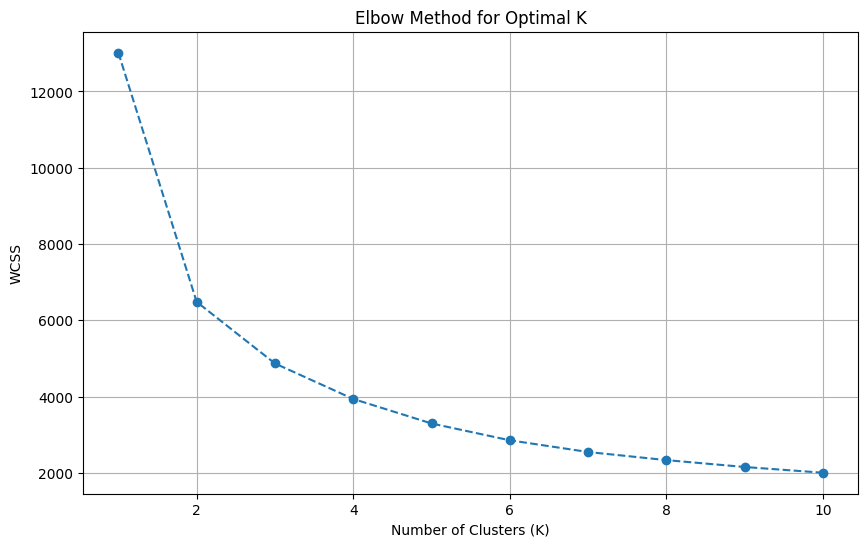

Elbow Method Plot displayed. Please analyze the plot to determine the optimal K.


In [65]:
# Elbow Method To Find Optimal K...
print("\nRunning Elbow Method to find optimal k..")
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, random_state = 42, n_init =10)
  kmeans.fit(rfm_scaled_df)
  wcss.append(kmeans.inertia_)

plt.figure(figsize = (10, 6))
plt.plot(range(1,11), wcss, marker ='o', linestyle = '--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

print("Elbow Method Plot displayed. Please analyze the plot to determine the optimal K.")



### 3.2 Determine Optimal Number of Clusters (K) using Silhouette Score


Running Silhouette Score to find Optimal K...


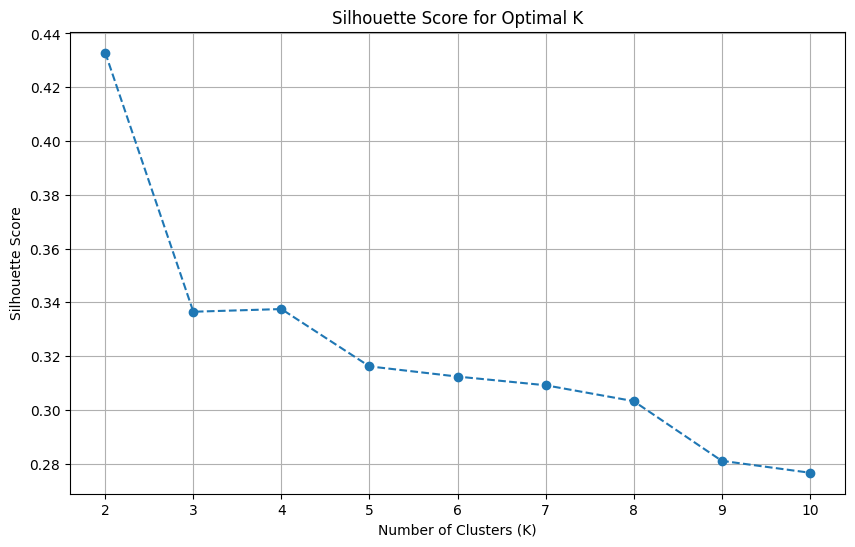

Silhouette Score Plot displayed. Please analyze the plot to determine the optimal K.


In [66]:
print("\nRunning Silhouette Score to find Optimal K...")
silhouette_scores = []
for i in range(2,11):
  kmeans = KMeans(n_clusters = i, random_state = 42, n_init =10)
  kmeans.fit(rfm_scaled_df)
  score = silhouette_score(rfm_scaled_df, kmeans.labels_)
  silhouette_scores.append(score)

plt.figure(figsize = (10,6))
plt.plot(range(2 , 11), silhouette_scores, marker = 'o', linestyle = '--')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

print("Silhouette Score Plot displayed. Please analyze the plot to determine the optimal K.")


**Manual Decision point :** choosing optimal_k on plots. From both the plots Elbow and silhouette we can see that the **Optimal_k = 3**.
Proceeding with optimal_k = 3 based on above analysis.

### 3.3 Apply K-Means Clustering

In [67]:
optimal_k = 3
kmeans_model = KMeans(n_clusters = optimal_k, random_state = 42, n_init =10)
rfm_df['Cluster'] = kmeans_model.fit_predict(rfm_scaled_df)
print(f"\nK-Means Clustering applied with {optimal_k} clusters.")


K-Means Clustering applied with 3 clusters.


### 3.4 Analyze Customer segments


Cluster Profiles (Mean of original RFM values): 
         Recency_Mean  Frequency_Mean  Monetary_Mean  Count
Cluster                                                    
0               17.06           13.35        7898.46    769
1              167.36            1.35         361.00   1872
2               44.20            3.38        1259.58   1697

Generating PCA plot for cluster visualization....


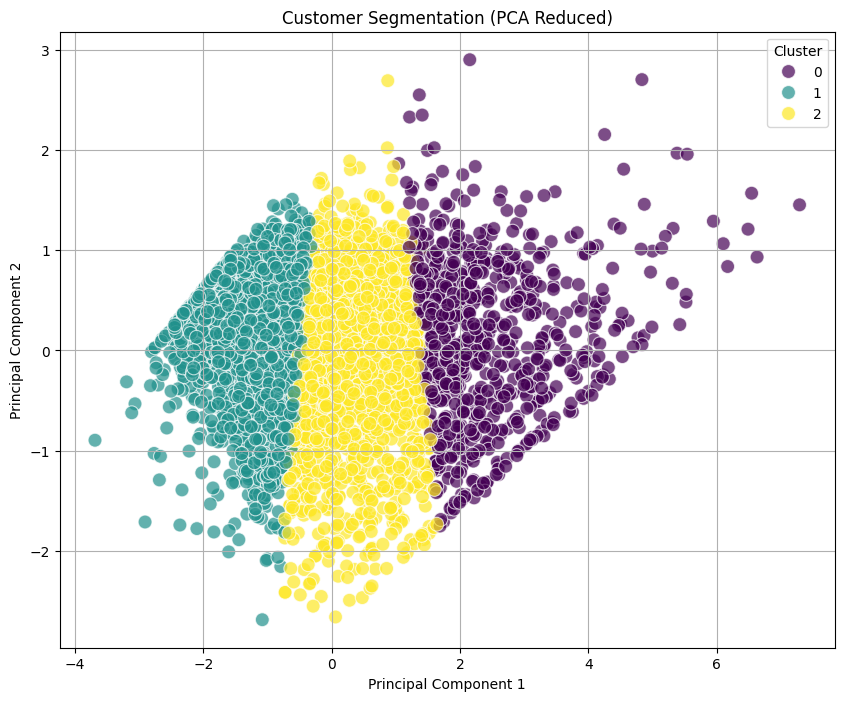

PCA plot displayed for customer segments.


In [68]:
print("\nCluster Profiles (Mean of original RFM values): ")
cluster_profiles = rfm_df.groupby('Cluster').agg(
    Recency_Mean = ('Recency', 'mean'),
    Frequency_Mean = ('Frequency', 'mean'),
    Monetary_Mean = ('Monetary', 'mean'),

).round(2)
# Add the count of customers per cluster separately using .size()
cluster_counts = rfm_df.groupby('Cluster').size().rename('Count')
cluster_profiles = cluster_profiles.merge(cluster_counts, left_index=True, right_index=True)

print(cluster_profiles)

# visualize the segments using PCA for 2D visualization
print("\nGenerating PCA plot for cluster visualization....")
pca = PCA(n_components = 2)
rfm_pca = pca.fit_transform(rfm_scaled_df)
rfm_pca_df = pd.DataFrame(data = rfm_pca, columns =['principal component 1','principal component 2'], index = rfm_scaled_df.index)
rfm_pca_df['Cluster'] = rfm_df['Cluster'] #adding cluster labels

plt.figure(figsize=(10,8))
sns.scatterplot(data = rfm_pca_df, x = 'principal component 1', y = 'principal component 2', hue = 'Cluster', palette='viridis', s=100 , alpha =0.7)
plt.title('Customer Segmentation (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()
print("PCA plot displayed for customer segments.")

# Phase 4

## Product Analysis and Recommendation System

### 4.1 Identify Top-Selling Products

In [69]:
df_products = df.copy()
df_products.dropna(subset=['Description'], inplace = True)
df_products['Description'] = df_products['Description'].str.strip()

top_selling_products = df_products.groupby(['StockCode', 'Description'])['Quantity'].sum().reset_index()
top_selling_products = top_selling_products.sort_values(by='Quantity', ascending = False)
top_selling_products.head(10)

,StockCode,Description,Quantity
2526,23843,"PAPER CRAFT , LITTLE BIRDIE",80995
2024,23166,MEDIUM CERAMIC TOP STORAGE JAR,77916
2702,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54319
3566,85099B,JUMBO BAG RED RETROSPOT,46078
3573,85123A,WHITE HANGING HEART T-LIGHT HOLDER,36706
2807,84879,ASSORTED COLOUR BIRD ORNAMENT,35263
359,21212,PACK OF 72 RETROSPOT CAKE CASES,33670
1035,22197,POPCORN HOLDER,30919
1930,23084,RABBIT NIGHT LIGHT,27153
1310,22492,MINI PAINT SET VINTAGE,26076


In [70]:
# filtering out common non_product items (e.g postage, manual, adjustments)
non_product_keywords = ['POSTAGE', 'DOTCOM POSTAGE', 'CRUK', 'DISCOUNT', 'SAMPLES', 'ADJUST', 'BANK CHARGES', 'AMAZON']
top_selling_products = top_selling_products[~top_selling_products['Description'].str.contains('|'.join(non_product_keywords), case = False, na=False)]

print("\nTop 10 selling products after filtering out non-product items: ")
print(top_selling_products.head(10))

overall_top_N = 10
overall_top_products = top_selling_products.head(overall_top_N)['StockCode'].tolist()
overall_top_discriptions = top_selling_products.head(overall_top_N).set_index('StockCode')['Description'].to_dict()
print(f"\n Identified top {overall_top_N} overall selling Products")



Top 10 selling products after filtering out non-product items: 
     StockCode                         Description  Quantity
2526     23843         PAPER CRAFT , LITTLE BIRDIE     80995
2024     23166      MEDIUM CERAMIC TOP STORAGE JAR     77916
2702     84077   WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
3566    85099B             JUMBO BAG RED RETROSPOT     46078
3573    85123A  WHITE HANGING HEART T-LIGHT HOLDER     36706
2807     84879       ASSORTED COLOUR BIRD ORNAMENT     35263
359      21212     PACK OF 72 RETROSPOT CAKE CASES     33670
1035     22197                      POPCORN HOLDER     30919
1930     23084                  RABBIT NIGHT LIGHT     27153
1310     22492              MINI PAINT SET VINTAGE     26076

 Identified top 10 overall selling Products


### 4.2 Recommendation Logic for Each segment

In [71]:
print("\nGenerating recommendations for customers within each segment...")

customer_purchased_items = df.groupby('CustomerID')['StockCode'].apply(list).to_dict()

recommendations_by_segments ={}

for cluster_id in sorted(rfm_df['Cluster'].unique()):
  segement_customers = rfm_df[rfm_df['Cluster'] == cluster_id].index.tolist()
  segement_recommendations = []

  print(f"\n---Recommendation for cluster {cluster_id} ---")
  #showing recommendations for first few customers in each segment
  for customer_id in segement_customers[:10]:
    purchased_items = set(customer_purchased_items.get(customer_id, []))
    unpurchased_top_products_display = []
    for product_code in overall_top_products:
      if product_code not in purchased_items:
        unpurchased_top_products_display.append(overall_top_discriptions.get(product_code, f"Unknown Product ({product_code})"))

    if unpurchased_top_products_display:
      print(f" Customer {customer_id}: Recommend: {','.join(unpurchased_top_products_display)}")
      segement_recommendations.append({'CustomerID': customer_id, 'Recommendation': unpurchased_top_products_display})
    else:
      print(f"Customer {customer_id}: No new products to recommend.")

  recommendations_by_segments[cluster_id] = segement_recommendations

print("\nRecommendation generation completed.")




Generating recommendations for customers within each segment...

---Recommendation for cluster 0 ---
 Customer 12347: Recommend: PAPER CRAFT , LITTLE BIRDIE,MEDIUM CERAMIC TOP STORAGE JAR,WORLD WAR 2 GLIDERS ASSTD DESIGNS,JUMBO BAG RED RETROSPOT,WHITE HANGING HEART T-LIGHT HOLDER,ASSORTED COLOUR BIRD ORNAMENT,PACK OF 72 RETROSPOT CAKE CASES,POPCORN HOLDER
 Customer 12352: Recommend: PAPER CRAFT , LITTLE BIRDIE,MEDIUM CERAMIC TOP STORAGE JAR,WORLD WAR 2 GLIDERS ASSTD DESIGNS,JUMBO BAG RED RETROSPOT,WHITE HANGING HEART T-LIGHT HOLDER,ASSORTED COLOUR BIRD ORNAMENT,PACK OF 72 RETROSPOT CAKE CASES,POPCORN HOLDER,RABBIT NIGHT LIGHT,MINI PAINT SET VINTAGE
 Customer 12362: Recommend: PAPER CRAFT , LITTLE BIRDIE,MEDIUM CERAMIC TOP STORAGE JAR,WORLD WAR 2 GLIDERS ASSTD DESIGNS,WHITE HANGING HEART T-LIGHT HOLDER,ASSORTED COLOUR BIRD ORNAMENT,PACK OF 72 RETROSPOT CAKE CASES,RABBIT NIGHT LIGHT
 Customer 12381: Recommend: PAPER CRAFT , LITTLE BIRDIE,MEDIUM CERAMIC TOP STORAGE JAR,WORLD WAR 2 GLIDER

# **Phase 5**

## Interpretation, Marketing Strategies, and Reporting

**Interpretation of Customer Segments:**
Based on the 'Cluster Profiles' table, I analyzed the mean Recency, Frequency, and Monetary values for each cluster.

Interpretations (assuming k=3, similar to a common RFM segmentation):
  - Cluster with low Recency, high Frequency, high Monetary: Likely 'Loyal/High-Value Customers'
  - Cluster with low Recency, low Frequency, low Monetary: Likely 'New Customers'
  - Cluster with high Recency, medium Frequency, medium Monetary: Likely 'At-Risk/Lapsing Customers'
  - Cluster with high Recency, low Frequency, low Monetary: Likely 'Churned/Lost Customers'

**Developing Targeted Marketing Strategies:**
For each identified segment, tailored marketing strategies:
  - **Loyal/High-Value Customers:** Focus on retention, loyalty programs, early access to new products, personalized offers, cross-selling high-margin items.
  - **New Customers:** Welcome series, introductory discounts, educational content about products, incentivize repeat purchases, recommend popular items.
  - **At-Risk/Lapsing Customers:** Re-engagement campaigns, personalized discounts on previously purchased items, surveys to understand reasons for inactivity, exclusive offers to win them back.
  - **Churned/Lost Customers:** Deep discounts to entice a return, clearance sales, or simply acknowledge as lost and focus resources elsewhere, depending on the business model.

**Recommendation System Integration:**
The recommendation system suggests top 10 overall selling products that customers in each segment *have not yet purchased*.
This can be used to:
  - Introduce new customers to popular products.
  - Encourage existing customers to explore a wider range of bestsellers.
  - Potentially re-engage at-risk customers with items they might have missed.

**Reporting:**
Compiled a report covering all phases: data loading, preprocessing, RFM calculation, K-Means clustering (with elbow/silhouette plots), segment profiling, and the product recommendation system.
Included actionable insights and specific marketing strategy recommendations for each customer segment, emphasizing how the recommended products fit into these strategies.
Discussed limitations (e.g., K-Means assumes spherical clusters, relies on chosen K, recommendation system is basic top-seller based) and potential future enhancements (e.g., collaborative filtering for recommendations, dynamic segmentation).